### TP : Markov chains

#### Partie 1 : Pleut-il?

In [1]:
import numpy as np
import pomegranate as pg
from partie1 import *
import matplotlib.pyplot as plt

Question 1 et 2 : voir le CR

In [2]:
# question 3
model = pg.HiddenMarkovModel()
## param
alpha = 0.65
beta  = 0.02
gamma = 0.9

In [3]:
B = np.array([[1,0],[0,1]])               # matrice d'émission temporaire
B

array([[1, 0],
       [0, 1]])

In [4]:
# seq d'observations
obsSeq

array([0, 0, 0, ..., 0, 0, 0])

In [5]:
#seq d'etats
statesSeq

array([0, 0, 0, ..., 0, 0, 0])

question 4

In [6]:
P1 = beta /(1+beta - alpha)
print("la probabilité qu’il pleuve vaut : ", P1)

P1_emp = statesSeq.sum()/len(statesSeq)
print("la probabilité qu’il pleuve empiriquement vaut : ", P1_emp)

la probabilité qu’il pleuve vaut :  0.05405405405405406
la probabilité qu’il pleuve empiriquement vaut :  0.0539


question 5

In [7]:
dureeSec,dureePluie,pdfSec,pdfPluie,binsSec,binsPluie = duree(statesSeq)

(array([  0., 685., 416., 257., 203.,  94.,  85.,  44.,  31.,  21.,  25.,
          8.,   9.,   4.,   1.]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 15 Patch objects>)

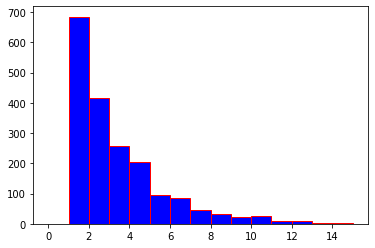

In [8]:
# histgramme de durée de pluie
plt.hist(dureePluie, range = (16),bins = binsPluie[:16], color = 'blue',
           edgecolor = 'red')


In [9]:
p = 1 - alpha
q = alpha


## 1ere methode : comparer la moyenne et la variance théoriques et empériques

# valeurs théoriques
Esp_th = 1/p
Var_th = q/p**2

#valeurs empiriques
Esp_emp = dureePluie.mean()
Var_emp = (dureePluie.std())**2

print("Type & Esperance & Variance")
print("theorique  ",'&',Esp_th,'&', Var_th )
print("Modèle  ",'&',Esp_emp,'&',Var_emp)

Type & Esperance & Variance
theorique   & 2.857142857142857 & 5.306122448979592
Modèle   & 2.8579003181336162 & 5.473975230784627


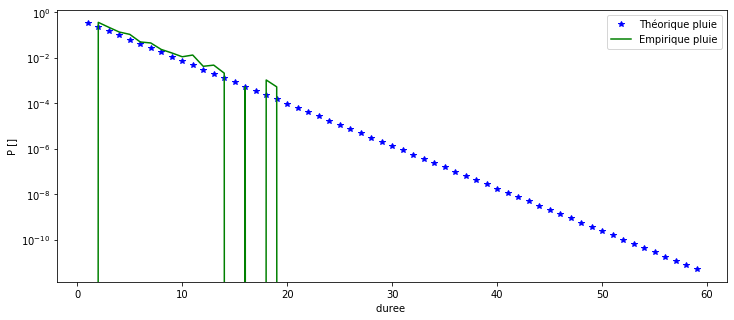

In [10]:
## 2ème methode :
pdfPluie_th = p * q**(binsPluie[1:]-1)

plt.figure(figsize=(12,5))
plt.semilogy(binsPluie[1:],pdfPluie_th, 'b*', label= "Théorique pluie")
plt.semilogy(binsPluie[1:],pdfPluie, 'g-', label= "Empirique pluie")
#plt.semilogy(binsSec[1:],pdfSec, 'r-', label= "Empirique sec")
plt.xlabel('duree ')
plt.ylabel('P []')
plt.legend()

Question 6 

In [11]:
Obser = ObsMesure.copy()
Obser[Obser==1] = 0
Obser[Obser==2] = 1

P1 = beta /(1+beta - alpha)
print("la probabilité qu’il pleuve vaut : ", P1)

P1_emp = Obser.sum()/len(Obser)
print("la probabilité qu’il pleuve empiriquement vaut : ", P1_emp)

la probabilité qu’il pleuve vaut :  0.05405405405405406
la probabilité qu’il pleuve empiriquement vaut :  0.04193130383997664


In [12]:
dureeSec2,dureePluie2,pdfSec2,pdfPluie2,binsSec2,binsPluie2 = duree(Obser)

In [15]:
Esp_emp_X = dureePluie2.mean()
Var_emp_X = (dureePluie2.std())**2

print("Type & Esperance & Variance")
print("Modèle  ",'&',Esp_emp,'&',Var_emp)
print("Expérience",'&',Esp_emp_X,'&', Var_emp_X)

Type & Esperance & Variance
Modèle   & 2.8579003181336162 & 5.473975230784627
Expérience & 5.758145363408521 & 108.27609280092462


Question 7

In [16]:
p = beta
q = (1-beta)


## 1ere methode : comparer la moyenne et la variance théoriques et empériques

# valeurs théoriques
Esp_th = 1/p
Var_th = q/p**2

#valeurs empiriques
Esp_emp_2 = dureeSec2.mean()
Var_emp_2 = (dureeSec2.std())**2
Esp_emp_1 = dureeSec.mean()
Var_emp_1 = (dureeSec.std())**2


print("Type & Esperance & Variance")
print("theorique (Espérance et Variance)   ",'&',Esp_th,'&', Var_th )
print("Modele (Espérance et Variance) ",'&',Esp_emp_1,'&', Var_emp_1)
print("Expérience (Espérance et Variance)  ",'&',Esp_emp_2,'&', Var_emp_2)

Type & Esperance & Variance
theorique (Espérance et Variance)    & 50.0 & 2450.0
Modele (Espérance et Variance)  & 50.02387267904509 & 2479.717732482463
Expérience (Espérance et Variance)   & 124.7153605015674 & 195978.04813396093


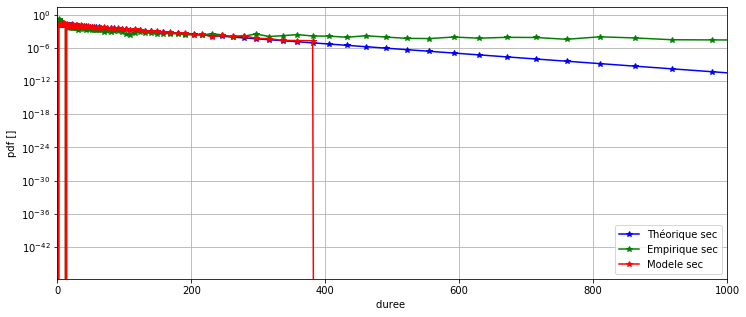

In [17]:
## 2ème methode :
pdfSec_th = p * q**(binsSec2[1:]-1)

plt.figure(figsize=(12,5))
plt.semilogy(binsSec2[1:],pdfSec_th, 'b*-', label= "Théorique sec")
plt.semilogy(binsSec2[1:],pdfSec2, 'g*-', label= "Empirique sec")
plt.semilogy(binsSec[1:],pdfSec, 'r*-', label= "Modele sec")
plt.xlabel('duree ')
plt.ylabel('pdf []')
plt.xlim((0,1000))
plt.legend()
plt.grid()

Question 8 : le modèle du chaine de Markov nous d'avoir une idée sur le comportement des états pour des faibles durées.

#### Partie 2 : pleut-il (suite)

Question 1 : Voir CR

In [18]:
from partie2 import *

In [19]:
dureeSec3,dureePluie3,pdfSec3,pdfPluie3,binsSec3,binsPluie3 = duree(obsSeq)

In [20]:
obsSeq

array([1, 0, 1, ..., 0, 0, 1])

In [21]:
P1_emp = (obsSeq==1).sum()/len(obsSeq)
P0_emp = (obsSeq==0).sum()/len(obsSeq)
print("la probabilité qu’il pleuve empiriquement vaut : ", P1_emp)
print("la probabilité qu’il ne pleut pas empiriquement vaut : ", P0_emp)
print("le pourcentage de pluie / sécheresse  : ", P1_emp/P0_emp*100)

la probabilité qu’il pleuve empiriquement vaut :  0.07788
la probabilité qu’il ne pleut pas empiriquement vaut :  0.92212
le pourcentage de pluie / sécheresse  :  8.445755433132348


In [22]:
#valeurs empiriques
Esp_emp_2 = dureePluie2.mean()
Var_emp_2 = (dureePluie2.std())**2
Esp_emp_1 = dureePluie3.mean()
Var_emp_1 = (dureePluie3.std())**2

print("Empirique (Espérance et Variance) 1 ",Esp_emp_1, Var_emp_1)
print("Expérience (Espérance et Variance) 2 ",Esp_emp_2, Var_emp_2)

Empirique (Espérance et Variance) 1  2.0103279111799637 3.7788760349994326
Expérience (Espérance et Variance) 2  5.758145363408521 108.27609280092462


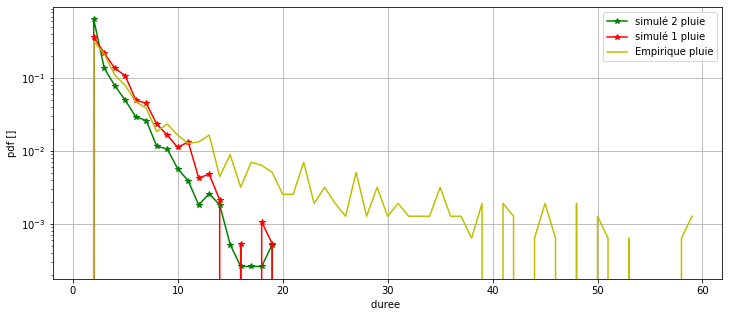

In [23]:
plt.figure(figsize=(12,5))
plt.semilogy(binsPluie3[1:],pdfPluie3, 'g*-', label= "simulé 2 pluie")
plt.semilogy(binsPluie[1:],pdfPluie, 'r*-', label= "simulé 1 pluie")
plt.semilogy(binsPluie2[1:],pdfPluie2, 'y-', label= "Empirique pluie")

plt.xlabel('duree ')
plt.ylabel('pdf []')
#plt.xlim((0,120))
plt.legend()
plt.grid()

    cette modélisation ne permet pas de bien représenter le support de la pluie

In [24]:
dureePluie.mean()

2.8579003181336162

In [25]:
dureePluie.var()

5.473975230784628

Question 3

In [26]:
tmp= [] # On crée une liste composé de string ‘sun’ et ‘rain’ à la place des 1 et 2
for o in ObsMesure:
    if o == 1:
        tmp.append('sun')
    else:
        tmp.append('rain')
model.fit([tmp],algorithm='baum-welch',max_iterations=1000)

{
    "class" : "HiddenMarkovModel",
    "name" : "partie 2",
    "start" : {
        "class" : "State",
        "distribution" : null,
        "name" : "partie 2-start",
        "weight" : 1.0
    },
    "end" : {
        "class" : "State",
        "distribution" : null,
        "name" : "partie 2-end",
        "weight" : 1.0
    },
    "states" : [
        {
            "class" : "State",
            "distribution" : {
                "class" : "Distribution",
                "dtype" : "str",
                "name" : "DiscreteDistribution",
                "parameters" : [
                    {
                        "sun" : 1.0,
                        "rain" : 0.0
                    }
                ],
                "frozen" : false
            },
            "name" : "c.sky",
            "weight" : 1.0
        },
        {
            "class" : "State",
            "distribution" : {
                "class" : "Distribution",
                "dtype" : "str",
                "n

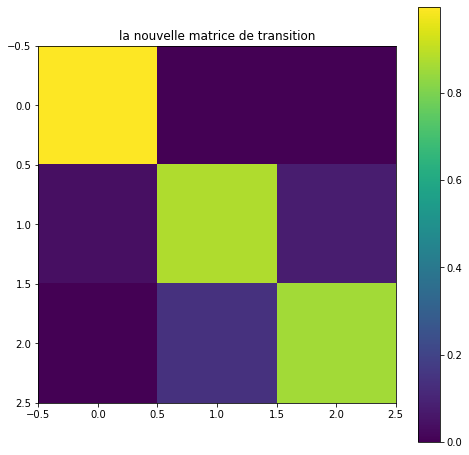

In [43]:
Te = model.dense_transition_matrix()
plt.figure(figsize=(8,8))
plt.title('la nouvelle matrice de transition')
plt.imshow(Mat[:3,:3])
plt.colorbar()
plt.show()

**matrice de transition**

In [44]:
Te[:3,:3]

array([[0.6, 0.4, 0. ],
       [0.3, 0.7, 0. ],
       [0.5, 0.5, 0. ]])

In [29]:
T

array([[0.9 , 0.1 , 0.  ],
       [0.5 , 0.4 , 0.1 ],
       [0.  , 0.35, 0.65]])

**matrice d'émission**

In [96]:
st = [sunny, cloudy, v_cloudy]
B_e = list()
for etat in st:
    Ee = etat.distribution.parameters[0]
    B_e.append(list(Ee.values()))
B_e = np.array(B_e)

In [97]:
B_e

array([[1.        , 0.        ],
       [0.96858719, 0.03141281],
       [0.        , 1.        ]])

In [91]:
B

array([[0.1, 0.4, 0.5],
       [0.6, 0.3, 0.1]])

In [95]:
B_init = np.array([[1,0],[0.8,0.2],[0,1]]) 
B_init

array([[1. , 0. ],
       [0.8, 0.2],
       [0. , 1. ]])

Question 4

In [30]:
# Génération d'une séquence de longueur Nsamples
obsSeq2,statesSeq2 = model.sample(length=Nsamples,path=True)

obsSeq2=np.array([dicoObs[t] for t in obsSeq2])      # Conversion des observables String -> int (0:beau, 1 pluie) )
statesSeq2=np.array([dicoState[t.name] for t in statesSeq2[1:]])   # Conversion des etats String -> int (0:beau, 1 pluie) )


In [31]:
dureeSec4,dureePluie4,pdfSec4,pdfPluie4,binsSec4,binsPluie4 = duree(obsSeq2)

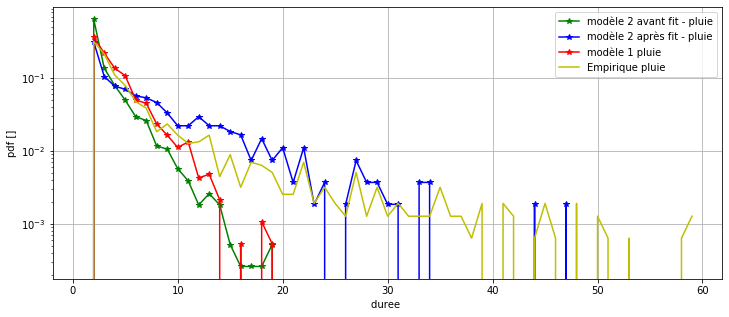

In [98]:
plt.figure(figsize=(12,5))
plt.semilogy(binsPluie3[1:],pdfPluie3, 'g*-', label= "modèle 2 avant fit - pluie")
plt.semilogy(binsPluie4[1:],pdfPluie4, 'b*-', label=  "modèle 2 après fit - pluie")
plt.semilogy(binsPluie[1:],pdfPluie, 'r*-', label= "modèle 1 pluie")
plt.semilogy(binsPluie2[1:],pdfPluie2, 'y-', label= "Empirique pluie")

plt.xlabel('duree ')
plt.ylabel('pdf []')
#plt.xlim((0,120))
plt.legend()
plt.grid()

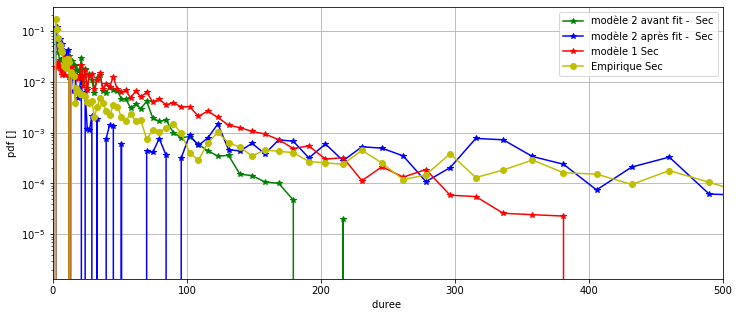

In [101]:
plt.figure(figsize=(12,5))
plt.semilogy(binsSec3[1:],pdfSec3, 'g*-', label= "modèle 2 avant fit -  Sec")
plt.semilogy(binsSec4[1:],pdfSec4, 'b*-', label= "modèle 2 après fit -  Sec")
plt.semilogy(binsSec[1:],pdfSec, 'r*-', label= "modèle 1 Sec")
plt.semilogy(binsSec2[1:],pdfSec2, 'yo-', label= "Empirique Sec")

plt.xlabel('duree ')
plt.ylabel('pdf []')
plt.xlim((0,500))
plt.legend()
plt.grid()

Cette nouvelle modélisation pourrait être intéressante pour la modélisation du support de la pluie car elle arrive à estimer la probabilité de la pluie pour des longues durées

In [34]:
P1_sim = (obsSeq2==1).sum()/len(obsSeq2)
P0_sim = (obsSeq2==0).sum()/len(obsSeq2)

P1_emp = (Obser==1).sum()/len(Obser)
P0_emp = (Obser==0).sum()/len(Obser)

Esp_emp_4 = dureePluie4.mean()
Var_emp_4 = dureePluie4.var()

print("P(Pluie) empiriquement vaut : ", P1_emp)
print("P(Pluie) apres fit vaut : ", P1_sim)
print("P(sec) empiriquement vaut : ", P0_emp)
print("P(sec) fit vaut : ", P0_sim)


print("Expérience pluie (Espérance et Variance) ",Esp_emp_2, Var_emp_2)
print("Apres fit  pluie (Espérance et Variance) ",Esp_emp_4, Var_emp_4)

P(Pluie) empiriquement vaut :  0.04193130383997664
P(Pluie) apres fit vaut :  0.03326
P(sec) empiriquement vaut :  0.9580686961600233
P(sec) fit vaut :  0.96674
Expérience pluie (Espérance et Variance)  5.758145363408521 108.27609280092462
Apres fit  pluie (Espérance et Variance)  6.125230202578269 46.27897669654637


In [102]:
# avec un aure indicateur
def kl_divergence(p, q):
    return np.sum(np.where(p*q != 0, p * np.log(p / q), 0))

print("KL entre HMM fit et exp : ",kl_divergence(pdfPluie4, pdfPluie2))
print("KL entre HMM non fit et exp : ",kl_divergence(pdfPluie4, pdfPluie))
print("KL entre CM et exp : ",kl_divergence(pdfPluie4, pdfPluie3))

KL entre HMM fit et exp :  0.14935368942731353
KL entre HMM non fit et exp :  0.15743089513494782
KL entre CM et exp :  0.44085936730888114


C:\Users\user\anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\user\anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\user\anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\user\anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in multiply
  This is separate from the ipykernel package so we can avoid doing imports until


#### Partie 3 : froid ou chaud ?

Question 1 : voir CR

Question 2 :

In [111]:
from partie3 import *

In [112]:
obe10 = [ 'fine', 'moyenne', 'fine', 'epaisse', 'moyenne', 'fine', 'moyenne', 'moyenne', 'moyenne', 'moyenne']
#obe10=np.array([dicoObs[t] for t in obe10]) 
#obe10

In [113]:
model.log_probability(obe10)

-10.905330869477169

In [114]:
model.probability(obe10)

1.836009736875e-05

In [115]:
nombre_etats = 3
taille_seq = 10
np.log(1/nombre_etats**taille_seq)

-10.986122886681096

la probabilité d'une séquence calculé en HMM est légerement supérieur de probabilité de tirer aléatoirement un état qui suit une loi uniforme. D'où, la dépendance des états 

Question 2 -b : Calculer la séquence d’état la plus probable de température 

In [136]:
state_name = np.array(list(dicoState.keys()))
state_name

array(['cold', 'hot'], dtype='<U4')

In [139]:
stat10 = np.array(model.predict(obe10, algorithm='viterbi'))[1:]

states = np.array([state_name[t] for t in stat10])


In [140]:
states

array(['hot', 'hot', 'hot', 'cold', 'cold', 'hot', 'hot', 'hot', 'hot',
       'hot'], dtype='<U4')

In [117]:
np.array([dicoObs[t] for t in obe10]) 

array([0, 1, 0, 2, 1, 0, 1, 1, 1, 1])

In [118]:
list(dicoState.keys())

['cold', 'hot']

In [42]:
for e in stat10:
    for (k, val) in dicoState.items():
        if val == e:
            e = k
            print(k)
stat10

hot
hot
hot
cold
cold
hot
hot
hot
hot
hot


array([2, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1])